In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import yfinance as yf
from pandas_datareader import data as pdr

In [2]:
# yf.pdr_override()

def get_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data



In [3]:
data = get_data('AAPL', '2010-01-01', '2024-01-01')
data1 = get_data('GOOG', '2010-01-01', '2024-01-01')
# data = pd.concat(data1, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# For time stamps
from datetime import datetime
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-10-16,176.750000,179.080002,176.509995,178.720001,177.810120,52517000,APPLE
2023-10-17,176.649994,178.419998,174.800003,177.149994,176.248108,57549400,APPLE
2023-10-18,175.580002,177.580002,175.110001,175.839996,174.944778,54764400,APPLE
2023-10-19,176.039993,177.839996,175.190002,175.460007,174.566742,59302900,APPLE
2023-10-20,175.309998,175.419998,172.639999,172.880005,171.999847,64189300,APPLE
...,...,...,...,...,...,...,...
2024-10-08,181.919998,183.089996,180.919998,182.720001,182.720001,26372100,AMAZON
2024-10-09,182.820007,185.850006,182.050003,185.169998,185.169998,26343100,AMAZON
2024-10-10,187.130005,188.130005,185.830002,186.649994,186.649994,27785000,AMAZON


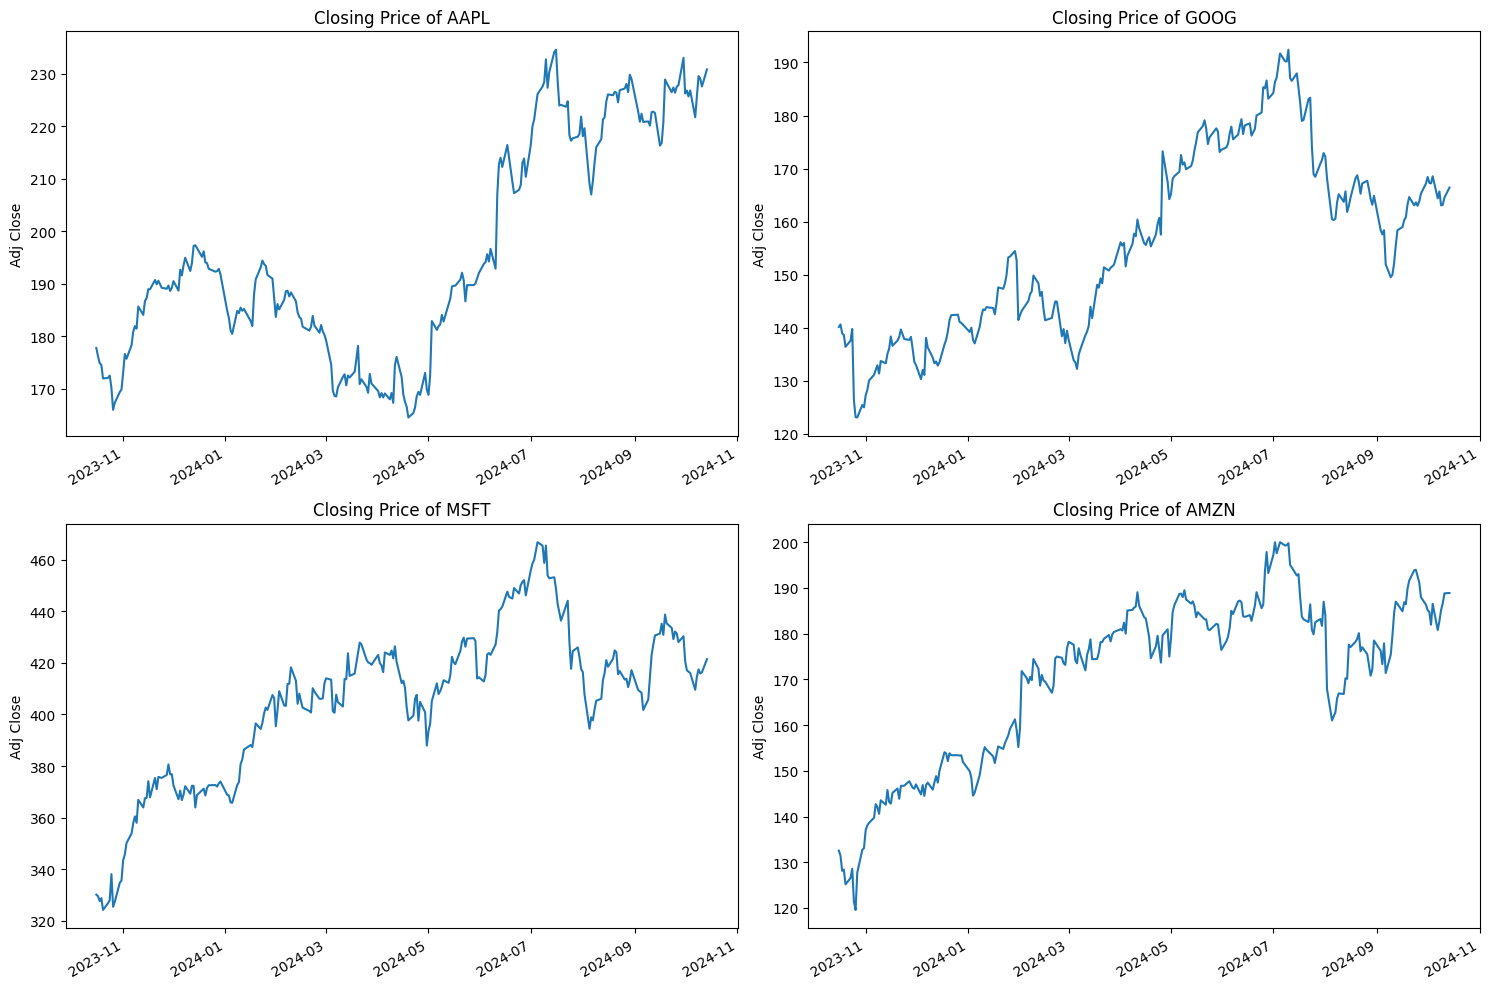

In [6]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

In [7]:
new_df = pd.DataFrame(df, columns=['Open', 'High', 'Low', 'Close'])
sc1 = MinMaxScaler()
sc2 = MinMaxScaler()

x = new_df[['Open', 'High', 'Low']]
y = new_df['Close']

x = sc1.fit_transform(x)
y = sc2.fit_transform(y.values.reshape(-1, 1))


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

0.999885823863913

In [9]:
type(y_test)

numpy.ndarray

In [10]:
for i in range(0, 5):
    print(f"Predicted price: {y_pred[i]} Actual price: {y_test[i]}")

Predicted price: [0.2021973] Actual price: [0.20095405]
Predicted price: [0.87589538] Actual price: [0.87832985]
Predicted price: [0.06348828] Actual price: [0.06388116]
Predicted price: [0.0903161] Actual price: [0.08307709]
Predicted price: [0.82179368] Actual price: [0.81985114]


In [11]:
y_pred = sc2.inverse_transform(y_pred.reshape(-1, 1))
y_test = sc2.inverse_transform(np.array(y_test).reshape(-1, 1))
y_train = sc2.inverse_transform(np.array(y_train).reshape(-1, 1))

In [12]:
for i in range(0, 5):
    print(f"Predicted price: {y_pred[i]} Actual price: {y_test[i]}")

Predicted price: [189.9326371] Actual price: [189.5]
Predicted price: [424.3728324] Actual price: [425.22000122]
Predicted price: [141.66328508] Actual price: [141.80000305]
Predicted price: [150.99909975] Actual price: [148.47999573]
Predicted price: [405.54598199] Actual price: [404.86999512]


In [13]:
model

LinearRegression()

In [15]:
# Load new data (example new data, make sure it's in the right format)
# Replace this with your actual new data
new_data = [[176.750, 179.08, 176.51]]  # Example new data, shape must match training data

# If you scaled your data during training, make sure to scale the new data too
new_data_scaled = sc1.transform(new_data)

# Make predictions on the new data
prediction = model.predict(new_data_scaled)

# If classification, you may get the predicted class:
predicted_class = prediction[0]
print(f'Predicted class: {predicted_class}')

Predicted class: [0.169358]


/Users/parthpsg/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [16]:
predicted_class = sc2.inverse_transform(predicted_class.reshape(-1, 1))
print(f'Predicted class: {predicted_class}')

Predicted class: [[178.50489092]]


In [17]:
new_df

,Open,High,Low,Close
Date,,,,
2023-10-16,176.750000,179.080002,176.509995,178.720001
2023-10-17,176.649994,178.419998,174.800003,177.149994
2023-10-18,175.580002,177.580002,175.110001,175.839996
2023-10-19,176.039993,177.839996,175.190002,175.460007
2023-10-20,175.309998,175.419998,172.639999,172.880005
...,...,...,...,...
2024-10-08,181.919998,183.089996,180.919998,182.720001
2024-10-09,182.820007,185.850006,182.050003,185.169998
2024-10-10,187.130005,188.130005,185.830002,186.649994


In [18]:
import joblib

# Save the scaler
joblib.dump(sc1, 'scaler1.pkl')
joblib.dump(sc2, 'scaler2.pkl')

# Save the model
joblib.dump(model, 'model.pkl')

['model.pkl']